# **Bubble Plot**

Scatter plottan bir farkı yoktur.

Bubble Plot'ta renge ve size'a anlamlar katılır. Bu yüzden farklı bir isimle anılır.

2016 yılındaki ilk 20 üniversitenin öğretme değerini üniversite sıralamasına göre karşılaştırmak amaçlanmaktadır. Bu görselleştirme yapılırken öğrenci sayısı bu plotun size'ı, international score da rengi olarak belirlenir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade plotly 

In [ ]:
!pip install jupyter-dash

In [4]:
timesData = pd.read_csv("/content/drive/MyDrive/data/timesData.csv")

In [5]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [6]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:] #2016 yılındaki ilk 20 üniversite seçilerek filtre oluşturulup,bu filtre dataya uygulanır.

In [7]:
df2016.info()  #num_students -> öğrenci sayıları sütunu string değer barındırır.
               #orantısal bir karşılaştırma yapabilmek için floata çevrilmesi gereklidir.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1803 to 1822
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              20 non-null     object 
 1   university_name         20 non-null     object 
 2   country                 20 non-null     object 
 3   teaching                20 non-null     float64
 4   international           20 non-null     object 
 5   research                20 non-null     float64
 6   citations               20 non-null     float64
 7   income                  20 non-null     object 
 8   total_score             20 non-null     object 
 9   num_students            20 non-null     object 
 10  student_staff_ratio     20 non-null     float64
 11  international_students  20 non-null     object 
 12  female_male_ratio       17 non-null     object 
 13  year                    20 non-null     int64  
dtypes: float64(4), int64(1), object(9)
memo

In [8]:
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students] # "2,4"(str) -> 2.4(float)
                      #filtredeki her değer for each döngüsüyle floata çevrilip, değerlerin arasındaki virgüller nokta yapılır.

In [9]:
international_color = [float(each) for each in df2016.international]
#üniversitelerin 2016 yılındaki international skoru international_color adlı değişkene for each döngüsüyle float olarak atanır.

In [10]:
data = [ #data içerisine trace koyulur.
    {
        'y': df2016.teaching, #y ekseninde filtredeki öğretme değerleri
        'x': df2016.world_rank, #x ekseninde filtredeki dünya sıralaması
        'mode': 'markers',      #scatter türü seçilir.
        'marker': {  #bubble plotun özelliği color'a ve size'a anlam katmasıdır.
            'color': international_color,
            'size': num_students_size,
            'showscale': True #plotun yanında bir barda renklerin derecesi gözükür.
                              #renk de öğrenci sayısına göre belirlendiğinden öğrenci sayısı arttığında koyu renkten açık renge doğru gider.
        },
        "text" :  df2016.university_name    #hoverın üzerine gelindiğinde üniversite adı gözükür.
    }
]
iplot(data)

Github'da Ipython kernel olmadığı için pyplot görselleştirmeleri 
gözükmemektedir. Bu yüzden png formatında yüklenmiştir.

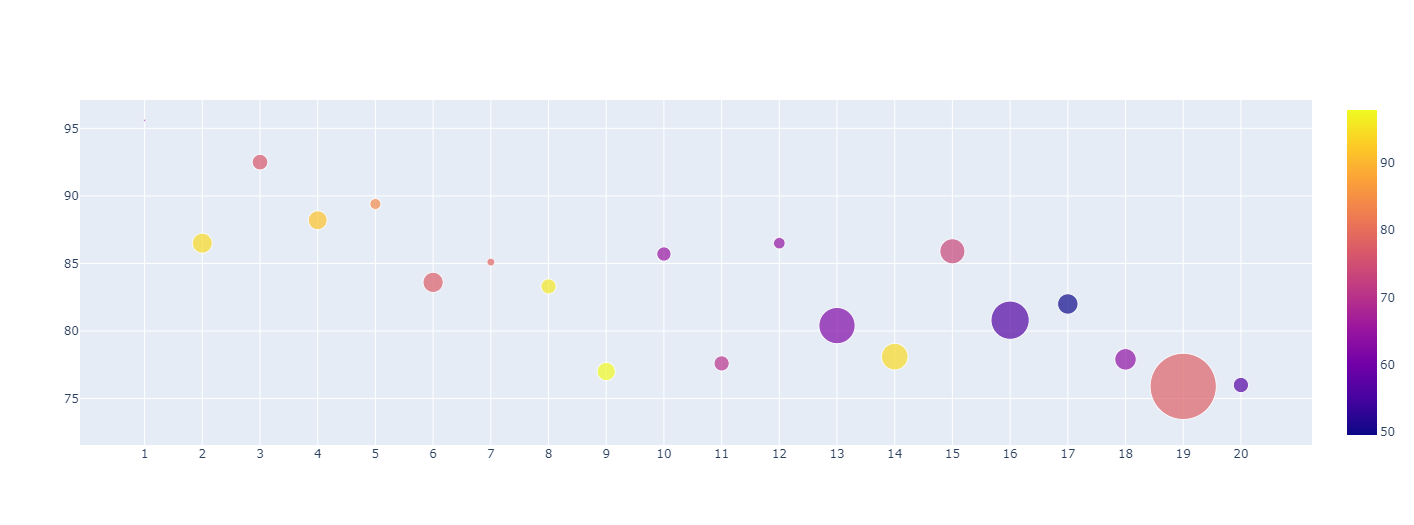

California Institute of Technology birinci sıradadır. Ancak öğrenci sayısının çok az olması nedeniyle plotta gözükmemektedir. Çünkü plotta size öğrenci sayısına göre belirlenmişti.

En büyük bubble University of Toronto'dur. Buradan öğrenci sayısı en fazla olan üniversite olduğu anlaşılır.

Plotta sarı renkte olan Zurich Üniversitesinin international score'unun yüksek olduğu anlaşılır.

x ve y ekseni bulunan 2 boyutlu grafik size eklenerek 3. boyuta ve color eklenerek de 4. boyuta çıkarılmıştır.